In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

from keijzer_exogan import *

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"} # Make sure the axis background of plots is white, this is usefull for the black theme in JupyterLab
sns.set()

In [2]:
path = '/datb/16011015/ExoGAN_data/'
filenames = 'chunck_0.pkgz'

X = load_all_to_array(path, filenames)

100%|██████████| 1/1 [00:11<00:00, 11.69s/it]


In [3]:
X[0].keys()

dict_keys(['data', 'param'])

In [4]:
X[0]['param']

{'planet_mass': 2.7837333333333334e+27,
 'temperature_profile': 1888.888888888889,
 'ch4_mixratio': 2.1544346900318865e-06,
 'planet_radius': 55928800.0,
 'h2o_mixratio': 1e-08,
 'co2_mixratio': 2.1544346900318865e-06,
 'co_mixratio': 2.1544346900318865e-06}

In [5]:
X[0]['data']['spectrum'].dtype # Converting to float 32 later on will improve memory usage

dtype('float64')

In [6]:
df = pd.DataFrame(X[0]['data']['spectrum'])
len(df)

515

In [7]:
df.columns = ['R']
df['wavelength'] = pd.DataFrame(np.arange(0.3, 50, (50-0.1)/len(df)))
df

,R,wavelength
0,0.006572,0.300000
1,0.006560,0.396893
2,0.006562,0.493786
3,0.006563,0.590680
4,0.006558,0.687573
5,0.006560,0.784466
6,0.006565,0.881359
7,0.006560,0.978252
8,0.006560,1.075146
9,0.006561,1.172039


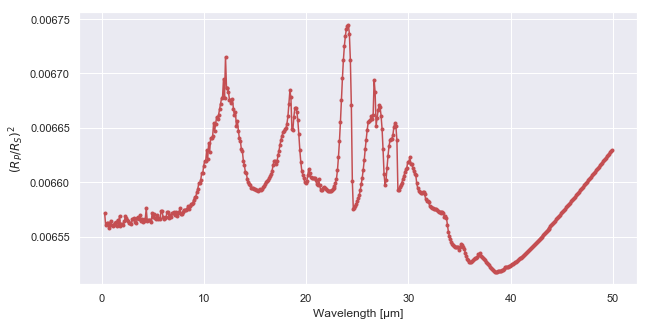

In [8]:
len(df)

plt.figure(figsize=(10,5))

plt.plot(df.wavelength, df.R, '.-', color='r')
plt.xlabel(r'Wavelength [µm]')
plt.ylabel(r'$(R_P / R_S)^2$')

plt.savefig('plots/sample_spectrum.png', dpi=1200)

# Extracting information to be used for decisions on creating the ASPA

In [9]:
t = X[:10] # select the first 10 samples for EDA

In [10]:
"""
At this point i do not yet know what the x axis from 0 to ~550 represents. 
However, it does represent something... so lets extract the index information and add it as a column
"""

'\nAt this point i do not yet know what the x axis from 0 to ~550 represents. \nHowever, it does represent something... so lets extract the index information and add it as a column\n'

In [11]:
len(X[0]['data']['spectrum'])

515

In [12]:
q = X[0]['data']['spectrum']
q.shape

(515,)

In [13]:
# Create artifical arrays to make sure the transformations go as planned

a = np.array([(10+10*i) for i in range(5)])
b = np.array([(20+20*i) for i in range(5)])
c = np.array([a, b])
c.shape

(2, 5)

In [14]:
q = np.expand_dims(c, axis=1)
q.shape

(2, 1, 5)

In [15]:
indices = np.array([i for i in range(5)])
indices

array([0, 1, 2, 3, 4])

In [16]:
combined = np.insert(q, 1, indices, axis=1)
combined.shape # [n_samples, (y_data, x_data), n_datapoints]

(2, 2, 5)

In [17]:
combined

array([[[ 10,  20,  30,  40,  50],
        [  0,   1,   2,   3,   4]],

       [[ 20,  40,  60,  80, 100],
        [  0,   1,   2,   3,   4]]])

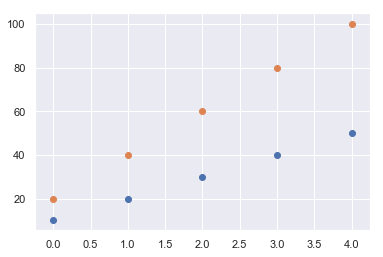

In [18]:
for i in range(q.shape[0]):
    plt.scatter(combined[i, 1, :], combined[i, 0, :]) # plot the i samples

# Do the same with the real data

In [19]:
X[0]['data']['spectrum'].shape

(515,)

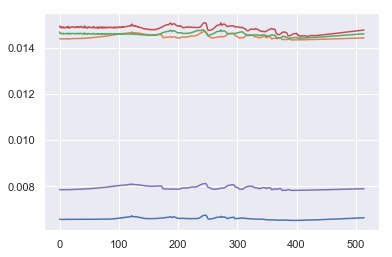

In [20]:
for i in range(5):
    sample = X[i]['data']['spectrum']
    plt.plot(np.arange(0, len(sample)), sample) # np.arange creates an awway from min to max

# Visualizing the distribution of X and y

In [21]:
# Shuffle X along the first axis to make the order of simulations random
np.random.shuffle(X) # note that X = np.rand.... isn't required

## Extracting information from dict and put it in a df

In [22]:
X[0]['param'].keys()

dict_keys(['planet_mass', 'temperature_profile', 'ch4_mixratio', 'planet_radius', 'h2o_mixratio', 'co2_mixratio', 'co_mixratio'])

In [23]:
"""
Extract data of all the samples, combine it into two arrays. 
Could be mroe efficient, but this is just for EDA purposes
"""

spectra = []
indices = []

for i in range(100):
    spectrum = X[i]['data']['spectrum'] # get the wavelength values
    spectrum_index = np.arange(0, len(sample)) # get the index values   
    
    spectra.append(spectrum)
    indices.append(spectrum_index)
    
    
spectra = np.array(spectra).flatten()
indices = np.array(indices).flatten()


print(spectra.shape, indices.shape)

(51500,) (51500,)


In [24]:
# Convert the arrays to a pandas dataframe
df1 = pd.DataFrame({"indices":indices, "spectra":spectra})
df1.head()

,indices,spectra
0,0,0.021153
1,1,0.021111
2,2,0.021099
3,3,0.021133
4,4,0.021099


In [25]:
# Construct the same type of df containing all the parameter info

# Visualization of the transformation for one sample
df2= pd.DataFrame.from_dict(X[0], orient='index')
df2

,spectrum,planet_mass,temperature_profile,ch4_mixratio,planet_radius,h2o_mixratio,co2_mixratio,co_mixratio
data,"[0.02115342899660508, 0.02111110715903557, 0.0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
param,NaN,2.783733e+27,1111.111111,0.000464,9.942898e+07,0.1,5.994843e-08,3.593814e-07


In [26]:
df2.drop(columns='spectrum').dropna() # First drops the spectrum row, then drops the NaNs in the data row

,planet_mass,temperature_profile,ch4_mixratio,planet_radius,h2o_mixratio,co2_mixratio,co_mixratio
param,2.783733e+27,1111.111111,0.000464,9.942898e+07,0.1,5.994843e-08,3.593814e-07


In [27]:
# lets do this for all the samples (that are selected)
dfs2 = []
for i in range(100):
    df2= pd.DataFrame.from_dict(X[i], orient='index')
    df2 = df2.drop(columns='spectrum').dropna() # First drops the spectrum row, then drops the NaNs in the data row
    dfs2.append(df2)

df2 = pd.concat(dfs2) # Concat the list of dfs to one df

In [28]:
df2.head()

,planet_mass,temperature_profile,ch4_mixratio,planet_radius,h2o_mixratio,co2_mixratio,co_mixratio
param,2.783733e+27,1111.111111,0.000464,9.942898e+07,1.000000e-01,5.994843e-08,3.593814e-07
param,3.796000e+27,1666.666667,0.000077,7.767889e+07,5.994843e-08,2.782559e-03,1.668101e-02
param,1.518400e+27,1888.888889,0.000077,6.136632e+07,3.593814e-07,2.154435e-06,3.593814e-07
param,3.036800e+27,1666.666667,0.002783,9.942898e+07,1.000000e-08,7.742637e-05,1.668101e-02
param,3.542933e+27,1333.333333,0.000464,1.048665e+08,3.593814e-07,2.154435e-06,2.782559e-03


# df1 and df2 are ready for EDA
Note that the plots of even 'only' 100 samples take a bit to be generated due to the point density.

## Spectrum distribution

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51500 entries, 0 to 51499
Data columns (total 2 columns):
indices    51500 non-null int64
spectra    51500 non-null float64
dtypes: float64(1), int64(1)
memory usage: 804.8 KB


In [30]:
df1.describe()

,indices,spectra
count,51500.000000,51500.000000
mean,257.000000,0.013632
std,148.668857,0.005195
min,0.000000,0.006480
25%,128.000000,0.009425
50%,257.000000,0.012883
75%,386.000000,0.016881
max,514.000000,0.026268


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


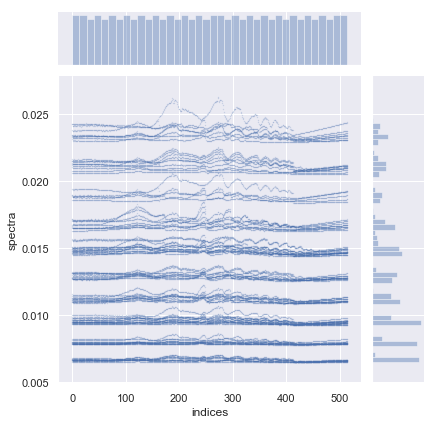

In [31]:
sns.jointplot(df1.indices, df1.spectra, joint_kws={"s":0.1, "alpha":0.3})

CPU times: user 44.1 s, sys: 214 ms, total: 44.3 s
Wall time: 14.9 s


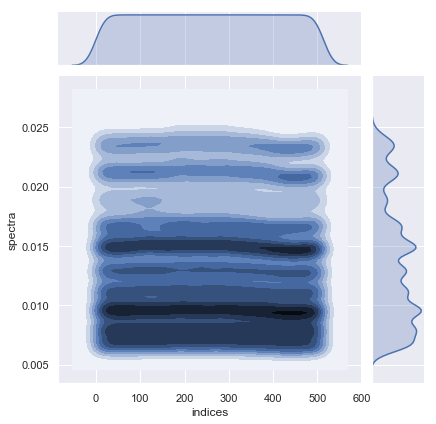

In [32]:
%%time

sns.jointplot(x="indices", y="spectra", data=df1, kind="kde")

CPU times: user 44.7 s, sys: 252 ms, total: 45 s
Wall time: 15 s


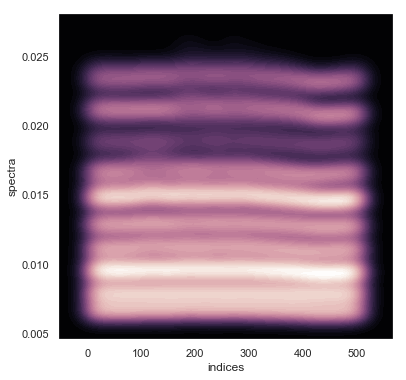

In [33]:
%%time

f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df1.indices, df1.spectra, cmap=cmap, n_levels=60, shade=True);

## Param distribution

In [34]:
df2.columns

Index(['planet_mass', 'temperature_profile', 'ch4_mixratio', 'planet_radius',
       'h2o_mixratio', 'co2_mixratio', 'co_mixratio'],
      dtype='object')

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, param to param
Data columns (total 7 columns):
planet_mass            100 non-null float64
temperature_profile    100 non-null float64
ch4_mixratio           100 non-null float64
planet_radius          100 non-null float64
h2o_mixratio           100 non-null float64
co2_mixratio           100 non-null float64
co_mixratio            100 non-null float64
dtypes: float64(7)
memory usage: 6.2+ KB


In [36]:
df2.describe()

,planet_mass,temperature_profile,ch4_mixratio,planet_radius,h2o_mixratio,co2_mixratio,co_mixratio
count,1.000000e+02,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,2.642016e+27,1545.555556,1.713019e-02,7.833139e+07,1.182888e-02,8.981000e-03,1.323732e-02
std,7.409333e+26,330.551429,3.532671e-02,1.509108e+07,3.128913e-02,2.558192e-02,3.111922e-02
min,1.518400e+27,1000.000000,1.000000e-08,5.592880e+07,1.000000e-08,1.000000e-08,1.000000e-08
25%,2.024533e+27,1222.222222,3.593814e-07,6.680384e+07,3.593814e-07,3.593814e-07,3.593814e-07
50%,2.783733e+27,1611.111111,4.641589e-04,7.767889e+07,1.291550e-05,1.291550e-05,1.291550e-05
75%,3.289867e+27,1888.888889,6.257171e-03,8.855393e+07,4.641589e-04,2.782559e-03,2.782559e-03
max,3.796000e+27,2000.000000,1.000000e-01,1.048665e+08,1.000000e-01,1.000000e-01,1.000000e-01


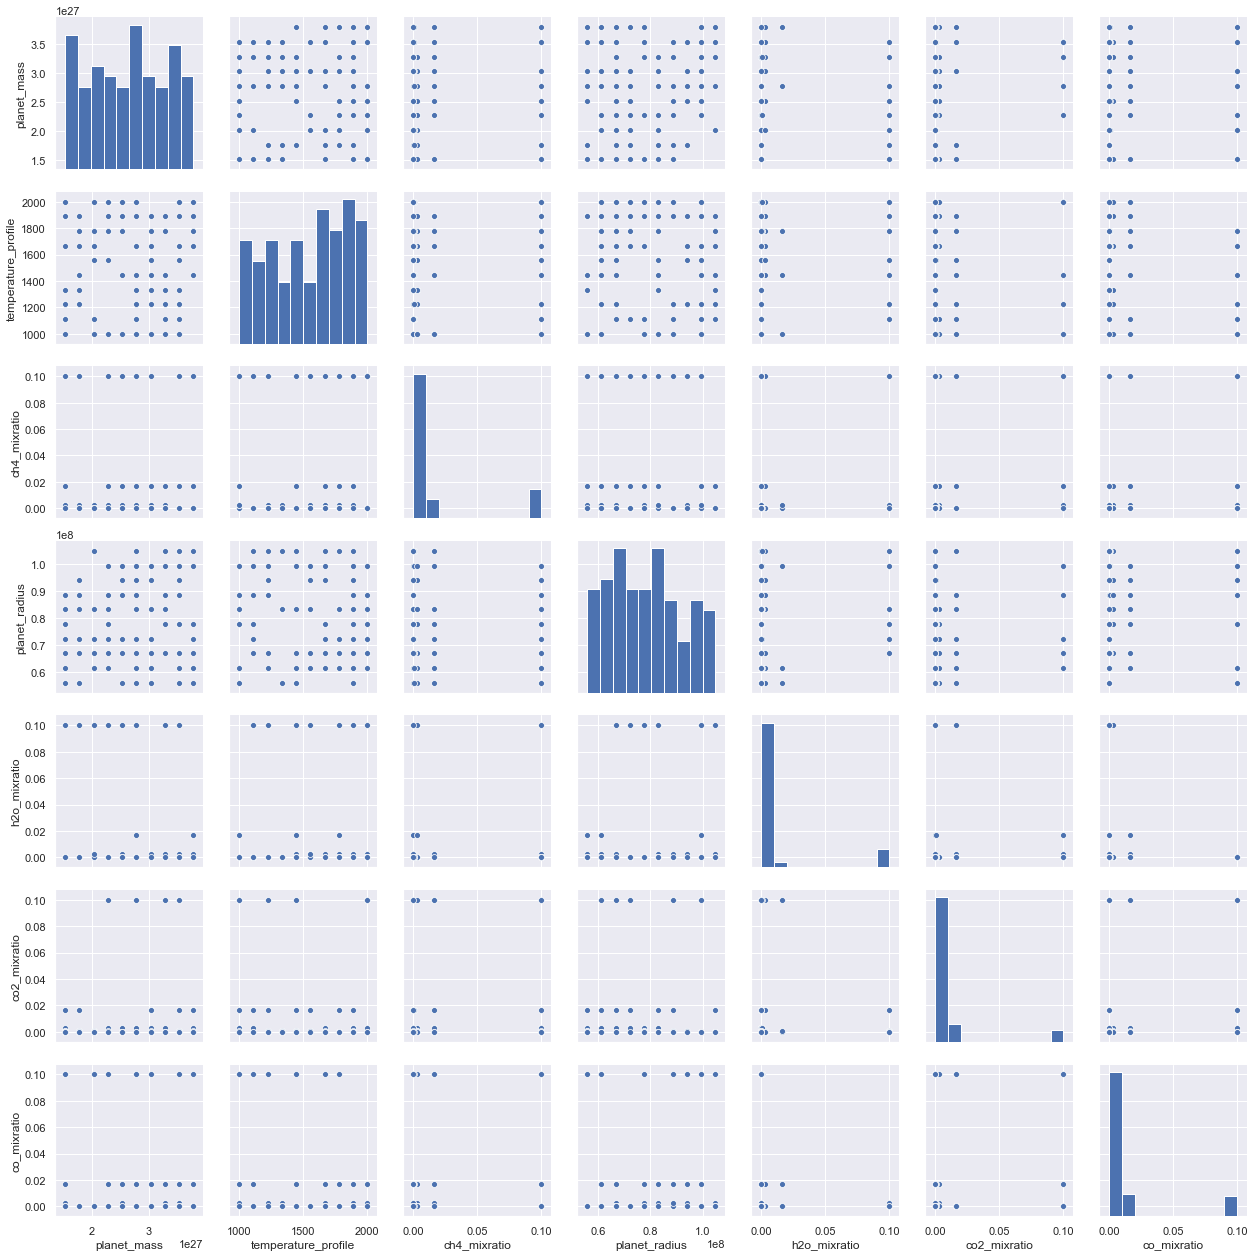

In [37]:
sns.pairplot(df2)

In [38]:
# Get the distribution of the complete (loaded) dataset
spectra = []
indices = []

for i in range(len(X)):
    spectrum = X[i]['data']['spectrum'] # get the wavelength values
    spectrum_index = np.arange(0, len(sample)) # get the index values   
    
    spectra.append(spectrum)
    indices.append(spectrum_index)
    
    
spectra = np.array(spectra).flatten()
indices = np.array(indices).flatten()

df1 = pd.DataFrame({"indices":indices, "spectra":spectra})

In [39]:
dfs2 = []
for i in range(100):
    df2= pd.DataFrame.from_dict(X[i], orient='index')
    df2 = df2.drop(columns='spectrum').dropna() # First drops the spectrum row, then drops the NaNs in the data row
    dfs2.append(df2)

df2 = pd.concat(dfs2) # Concat the list of dfs to one df

In [40]:
%%time
df1.describe()

CPU times: user 54.1 s, sys: 9.73 s, total: 1min 3s
Wall time: 6.1 s


,indices,spectra
count,5.150000e+07,5.150000e+07
mean,2.570000e+02,1.443345e-02
std,1.486674e+02,5.556946e-03
min,0.000000e+00,6.472850e-03
25%,1.280000e+02,9.457117e-03
50%,2.570000e+02,1.384540e-02
75%,3.860000e+02,1.897269e-02
max,5.140000e+02,3.017950e-02


In [41]:
%%time
df2.describe()

CPU times: user 7.65 ms, sys: 7.96 ms, total: 15.6 ms
Wall time: 14.4 ms


,planet_mass,temperature_profile,ch4_mixratio,planet_radius,h2o_mixratio,co2_mixratio,co_mixratio
count,1.000000e+02,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,2.642016e+27,1545.555556,1.713019e-02,7.833139e+07,1.182888e-02,8.981000e-03,1.323732e-02
std,7.409333e+26,330.551429,3.532671e-02,1.509108e+07,3.128913e-02,2.558192e-02,3.111922e-02
min,1.518400e+27,1000.000000,1.000000e-08,5.592880e+07,1.000000e-08,1.000000e-08,1.000000e-08
25%,2.024533e+27,1222.222222,3.593814e-07,6.680384e+07,3.593814e-07,3.593814e-07,3.593814e-07
50%,2.783733e+27,1611.111111,4.641589e-04,7.767889e+07,1.291550e-05,1.291550e-05,1.291550e-05
75%,3.289867e+27,1888.888889,6.257171e-03,8.855393e+07,4.641589e-04,2.782559e-03,2.782559e-03
max,3.796000e+27,2000.000000,1.000000e-01,1.048665e+08,1.000000e-01,1.000000e-01,1.000000e-01
